In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT+HOUSING_PATH+"/housing.tgz"

def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
#This function returns a Pandas DataFrame object containing

In [4]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


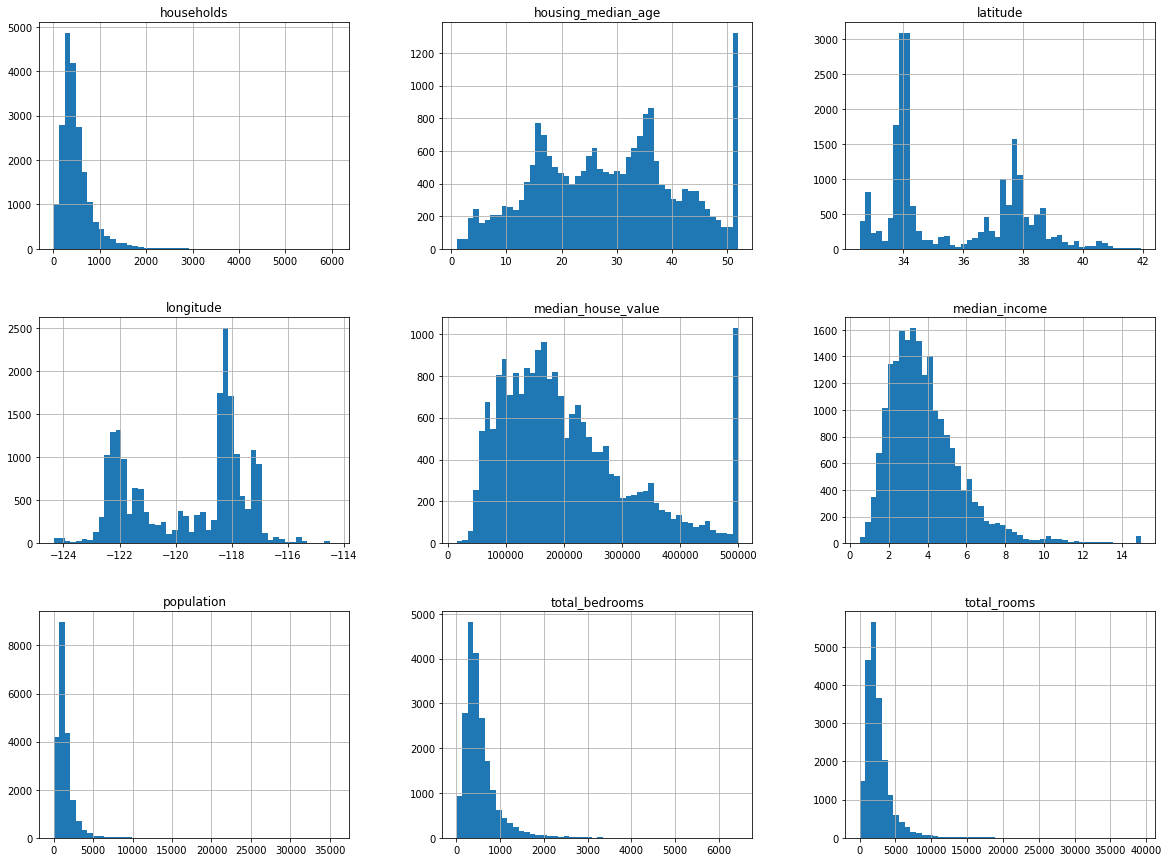

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
import hashlib
def test_set_check(identifier,test_ratio,hash):
  #  print(np.int64(identifier))
    return hash(np.int64(identifier)).digest()[-1]<test_ratio*256

import numpy as np

housing_with_id=housing.reset_index()

def split_train_test(data,test_ratio,identifier,hash=hashlib.md5):
    ids=data[identifier]
    test_ids=ids.apply(lambda _id:test_set_check(_id,test_ratio,hash))
    return data.loc[~test_ids],data.loc[test_ids]

In [9]:
strat_train_set,strat_test_set=split_train_test(housing_with_id,0.2,"index")

In [10]:
housing= strat_train_set.copy()

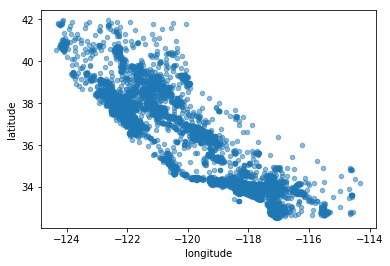

In [11]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5)

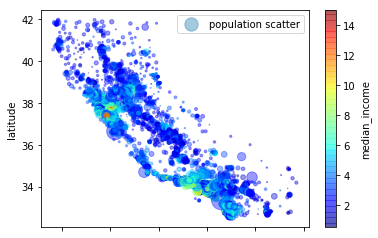

In [12]:
housing.plot(kind="scatter",x="longitude",y="latitude",	alpha=0.4,
				s=housing["population"]/100,label="population scatter",
				c="median_income",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c8d8e5c0>,
      dtype=object)

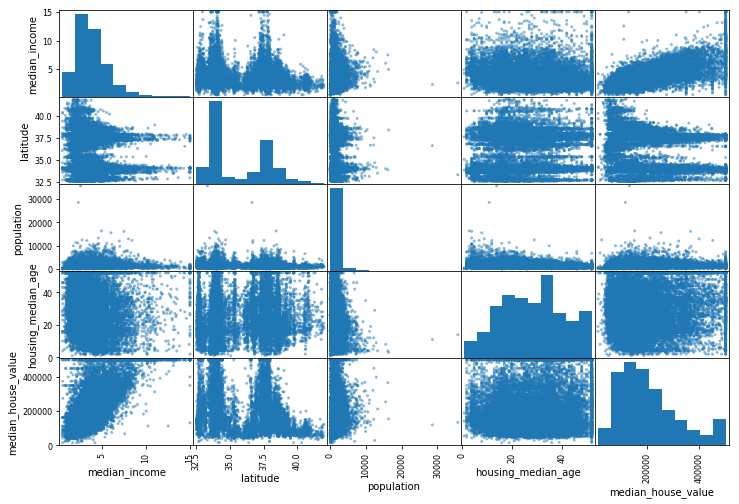

In [13]:
from pandas.tools.plotting import scatter_matrix as scm
attributes=['median_income','latitude','population','housing_median_age','median_house_value']
scm(housing[attributes],figsize=(12,8))
#from pandas.tools.plotting import scatter_matrix
#attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
#scatter_matrix(housing[attributes],figsize=(12,8))


# median_income and median_house_value have direct relationship

In [14]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# 'housing' is the train set now

In [15]:
housing=strat_train_set.drop("median_house_value",	axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [16]:
#  housing with only the numerical attributes
housing_num=housing.drop("ocean_proximity",axis=1)

In [17]:
from sklearn.preprocessing	import	Imputer
imputer	=Imputer(strategy="median")

In [18]:
#replacin n/a values with median value of each column
imputer.fit(housing_num)
imputed=imputer.transform(housing_num)
print(imputed)

[[ 0.0000e+00 -1.2223e+02  3.7880e+01 ...  3.2200e+02  1.2600e+02
   8.3252e+00]
 [ 1.0000e+00 -1.2222e+02  3.7860e+01 ...  2.4010e+03  1.1380e+03
   8.3014e+00]
 [ 2.0000e+00 -1.2224e+02  3.7850e+01 ...  4.9600e+02  1.7700e+02
   7.2574e+00]
 ...
 [ 2.0636e+04 -1.2121e+02  3.9490e+01 ...  3.5600e+02  1.1400e+02
   2.5568e+00]
 [ 2.0638e+04 -1.2132e+02  3.9430e+01 ...  7.4100e+02  3.4900e+02
   1.8672e+00]
 [ 2.0639e+04 -1.2124e+02  3.9370e+01 ...  1.3870e+03  5.3000e+02
   2.3886e+00]]


In [19]:
#imputed data has no n/a s
housing_train=pd.DataFrame(imputed,columns=housing_num.columns)

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat	= housing["ocean_proximity"]
housing_cat_encoded	=encoder.fit_transform(housing_cat)
print(housing_cat_encoded)

[3 3 3 ... 1 1 1]


In [21]:
reshaped_housing_cat=housing_cat_encoded.reshape(-1,1)
print(housing_cat_encoded)
print(reshaped_housing_cat)
#print(len(reshaped_housing_cat))
mytestArr=np.array([1,2,3,4,5,6,7,8])
#adding a column to housing num
housing_num["mytestCol"]=pd.DataFrame(mytestArr)

#filling the N/A s.because mytestArr length is shorter than housing num index so 
#there will be N/A s

imputer=Imputer(strategy="median")
imputer.fit(housing_num)
imputed=imputer.transform(housing_num)

housing_num=housing_num.drop("mytestCol",axis=1)
#print(housing_num)


[3 3 3 ... 1 1 1]
[[3]
 [3]
 [3]
 ...
 [1]
 [1]
 [1]]


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
#print(housing_cat_1hot)

# Using LabelBinarizer library for converting the text values of ocean_proximity to binary format

In [23]:
from sklearn.preprocessing	import	LabelBinarizer
encoder	=	LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
print("ocean proximity different values : ",encoder.classes_,'\n')
print(housing_cat_1hot)
df_1hot = pd.DataFrame(housing_cat_1hot)
#pd.concat([housing_num,df_1hot], ignore_index=True, axis=1)
#print(housing_num)


ocean proximity different values :  ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN'] 

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [24]:
from	sklearn.base	import	BaseEstimator,	TransformerMixin
rooms_ix,	bedrooms_ix,	population_ix,	household_ix	=	3,	4,	5,	6
class	CombinedAttributesAdder(BaseEstimator,	TransformerMixin):
				def	__init__(self,	add_bedrooms_per_room	=	True):	#	no	*args	or	**kargs
								self.add_bedrooms_per_room	=	add_bedrooms_per_room
				def	fit(self,	X,	y=None):
								return	self		#	nothing	else	to	do
				def	transform(self,	X,	y=None):
								rooms_per_household	=	X[:,	rooms_ix]	/	X[:,	household_ix]
								population_per_household	=	X[:,	population_ix]	/	X[:,	household_ix]
								if	self.add_bedrooms_per_room:
												bedrooms_per_room	=	X[:,	bedrooms_ix]	/	X[:,	rooms_ix]
												return	np.c_[X,	rooms_per_household,	population_per_household,
																									bedrooms_per_room]
								else:
												return	np.c_[X,	rooms_per_household,	population_per_household]
attr_adder	=	CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs	=	attr_adder.transform(housing.values)


# StandardScaler makes all the features have the similar range or at least a close range 

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,atrrnames):
        self.atrrnames=atrrnames
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X[self.atrrnames].values
    
from sklearn.pipeline import FeatureUnion
num_attribs	=list(housing_num)
cat_attribs	=["ocean_proximity"]
num_pipeline=Pipeline([
					('selector',	DataFrameSelector(num_attribs)),
					('imputer',	Imputer(strategy="median")),
                    ('attribs_adder',	CombinedAttributesAdder()),
					('std_scaler',	StandardScaler()),
                    ])
cat_pipeline=Pipeline([
				('selector',	DataFrameSelector(cat_attribs)),
				('label_binarizer',	LabelBinarizer()),
				])
full_pipeline=FeatureUnion(transformer_list=[
				("num_pipeline",num_pipeline),
				("cat_pipeline",cat_pipeline),
				])

#data which is all numerical and no N/A s in it
housing_prepared=full_pipeline.fit_transform(housing)
#print(housing_prepared[:5])

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg	=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#preparing some test from the first 4 items in housing dataset
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

# *Testing errors with MSE

In [28]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
print(housing_labels[:5],"\n\n\n")
print(housing_predictions[:5].reshape(-1,1))
print("\nmse error :",lin_rmse) #we use the whole training
                              #error : 68470 its to high ,which means it's underfit
                              #we should use another algorithm for prediction

0    452600.0
1    358500.0
2    352100.0
3    341300.0
6    299200.0
Name: median_house_value, dtype: float64 



[[401373.42717849]
 [418914.87573642]
 [372061.20977645]
 [316084.48251373]
 [256105.34906368]]

mse error : 68470.74467407452


In [29]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions=tree_reg.predict(housing_prepared)#we use the whole training
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
print(housing_labels[:5],"\n\n\n")
print(housing_predictions[:5].reshape(-1,1))
print("\nmse error :",tree_rmse) #error : 0.0 it's likely that model is overfitted

0    452600.0
1    358500.0
2    352100.0
3    341300.0
6    299200.0
Name: median_house_value, dtype: float64 



[[452600.]
 [358500.]
 [352100.]
 [341300.]
 [299200.]]

mse error : 0.0


In [30]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
print(housing_labels[:5],"\n\n\n")
print(housing_predictions[:5].reshape(-1,1))
print("\nmse error :",forest_rmse)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
6    299200.0
Name: median_house_value, dtype: float64 



[[422880.]
 [367340.]
 [381410.]
 [361920.]
 [284430.]]

mse error : 21654.692691291424


# *Testing errors with CROSS VALIDATION

In [31]:
from sklearn.model_selection import cross_val_score
def	display_scores(scores):
	print("Scores:",scores)
	print("Mean:",scores.mean())
	print("Standard deviation:",scores.std())

In [32]:
tree_scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                         scoring= "neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [138638.21687177  75760.66412628  89069.2001561   75279.62513629
 101276.50942025  78279.89861668  71413.99151684 108851.82767954
  93754.87311185 141233.16159855]
Mean: 97355.79682341503
Standard deviation: 24185.120758017205


In [33]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [89783.33758199 62097.18928434 90835.14648817 62000.31249861
 82329.85979522 69850.56787115 54710.11463797 90261.28821184
 77144.9665795  57273.96142154]
Mean: 73628.67443703231
Standard deviation: 13526.312072901468


# linear regression has less error with smaller diviation than  tree with cross validation

In [34]:
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=cross_val_score(forest_reg,housing_prepared,housing_labels,
    scoring="neg_mean_squared_error",cv=10)
forest_rmse=np.sqrt(-forest_mse)
display_scores(forest_rmse)

Scores: [ 91712.5130403   58116.71674408  73845.91682992  59607.79276255
  70676.2832793   60832.89785736  48536.04180955  81827.41399055
  74354.98150401 105519.48608509]
Mean: 72503.00439027071
Standard deviation: 16243.357043846954


# Random Forest has an almost equal result with linear regression with cross validation 

# Finetuning the hyper parameters

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid=[
			{'n_estimators': [3,	10,	30],'max_features':[2,	4,	6,	8]},
			{'bootstrap':	[False],'n_estimators':	[3,	10],'max_features':	[2,	3,	4]},
            ]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,	cv=5,
						scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [36]:
print(grid_search.best_params_)

{'max_features': 4, 'n_estimators': 30}


In [59]:
feature_importances=grid_search.best_estimator_.feature_importances_
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs=list(encoder.classes_)
attributes=num_attribs+extra_attribs+cat_one_hot_attribs # how does it find the pair value for label?
print(attributes,"\n")
print(housing.columns.values,"\n")
print(np.size(housing_prepared,1),"\n")
print(len(feature_importances))
sorted(zip(feature_importances,attributes),reverse=True)

['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] 

['index' 'longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'ocean_proximity'] 

17 

17


[(0.3183921412928766, 'median_income'),
 (0.15215284220434663, 'INLAND'),
 (0.08093388790826077, 'longitude'),
 (0.07863894341936699, 'latitude'),
 (0.07545778636229149, 'pop_per_hhold'),
 (0.0729656008833057, 'index'),
 (0.03396648355968542, 'housing_median_age'),
 (0.03220997702503054, 'total_rooms'),
 (0.02979644861065655, 'rooms_per_hhold'),
 (0.026116174489318834, 'population'),
 (0.025639496086564496, 'bedrooms_per_room'),
 (0.02233383666958573, 'households'),
 (0.01982386416535824, '<1H OCEAN'),
 (0.019375784632889016, 'total_bedrooms'),
 (0.007353865423875711, 'NEAR OCEAN'),
 (0.004649892349695133, 'NEAR BAY'),
 (0.00019297491689231048, 'ISLAND')]

# INLAND is the most important attribute in our data set for estimationg the result

In [60]:
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()
X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)
final_MSE=mean_squared_error(y_test,final_predictions)
final_RMSE=np.sqrt(final_MSE)

In [62]:
print("Least error that we can achieve: ",final_RMSE)

Least error that we can achieve:  47517.895029954
